# Pairs Trading

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels
# import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
import yfinance as yf
import statsmodels.formula.api as sm

In [2]:
Tickers_nyse = pd.read_csv("tickers_nyse.csv")

In [3]:
Tickers_nyse["Sector"].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Energy'], dtype=object)

In [4]:
health_data=Tickers_nyse[Tickers_nyse["Sector"]=="Health Care"]

In [5]:
ticker_list=health_data.Symbol.values

In [6]:
df = yf.download(" ".join(ticker_list), start = "2022-02-14", end = "2022-04-06", interval="5m")["Adj Close"]

[*********************100%***********************]  64 of 64 completed


In [7]:
missing_tickers=df.isna().sum()[df.isna().sum()>0].index

In [8]:
full_tickers=[ele for ele in ticker_list if ele not in missing_tickers]

In [9]:
df=df.loc[:,full_tickers]

In [10]:
data=df.dropna()

In [11]:
data=pd.DataFrame(data=data.values, columns=full_tickers)

In [12]:
n = data.shape[1]
score_matrix = np.zeros((n, n))
pvalue_matrix = np.ones((n, n))
stock = data.columns

In [13]:
data_train=data[2000:]

In [14]:
data

,ABT,ABBV,A,ABC,AMGN,ANTM,BAX,BDX,BIIB,BSX,...,OGN,PFE,DGX,SYK,TMO,UNH,VRTX,VTRS,ZBH,ZTS
0,124.940002,141.839996,136.985001,140.479996,224.729996,447.404999,85.550003,262.824402,213.550003,42.840000,...,34.744999,50.130001,131.779999,251.565002,565.219971,476.795013,233.020004,15.1901,112.407768,198.866592
1,124.949997,141.080002,137.020004,140.429993,223.831604,449.029999,85.574997,263.219513,214.869995,43.000000,...,34.720001,49.900002,131.539993,252.759995,566.784973,476.399994,232.690002,15.1621,113.315536,199.000000
2,124.550003,140.860001,136.850006,140.479996,223.389999,447.850006,85.360001,263.546356,214.070007,43.005001,...,34.570000,49.599998,131.380005,252.490005,566.330017,475.565002,232.220001,15.1550,113.402916,198.979996
3,124.489998,140.699997,136.994995,140.399994,223.050003,447.970001,85.010002,263.395111,213.539993,42.889999,...,34.709999,49.570000,131.309998,252.009995,566.820007,475.831696,231.130005,15.1350,113.194176,199.229996
4,124.400002,140.563507,136.875000,140.320007,223.000000,447.980011,84.875000,262.819519,214.279999,43.002399,...,34.650002,49.514999,131.279999,252.440002,566.530029,475.760010,231.985001,15.1500,113.757278,199.160004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,119.500000,163.535004,133.619995,155.720001,244.929993,495.230011,76.599998,262.820007,208.220001,44.240002,...,35.599998,51.235001,133.250000,269.859985,584.859985,517.239990,270.187805,10.7050,129.095001,188.190002
2805,119.290001,163.250000,133.304993,155.389999,244.800003,493.839996,76.415001,262.404999,208.110001,44.195000,...,35.330002,51.115002,133.184998,269.230011,584.299988,515.809998,269.799988,10.6800,128.990005,187.759995
2806,119.498100,163.375000,133.410004,155.449997,244.550003,494.315002,76.489998,262.859985,207.820007,44.320000,...,35.330002,51.200001,133.589996,269.059998,584.710022,516.450012,269.619995,10.6650,129.160004,188.000000
2807,119.500000,163.440002,133.259995,155.770004,244.529999,494.790009,76.500000,262.940002,207.619995,44.360001,...,35.410000,51.279999,133.710007,268.510010,584.150024,518.229980,269.970001,10.6700,129.169998,188.350006


### Checking for relevant pairs

In [15]:
pairs = []
for i in range(n):
    for j in range(i+1, n):
        
        S1 = data_train[stock[i]]
        S2 = data_train[stock[j]]
        result = coint(S1, S2)
        score = result[0]
        pvalue = result[1]
        score_matrix[i, j] = score
        pvalue_matrix[i, j] = pvalue
        if pvalue < 0.05:
            pairs.append((stock[i], stock[j]))

In [16]:
pd.DataFrame(pairs)

,0,1
0,ABT,ABBV
1,ABT,BDX
2,ABT,JNJ
3,A,BAX
4,A,BIIB
5,A,XRAY
6,A,VTRS
7,ABC,LLY
8,ABC,HOLX
9,BIIB,CNC


In [17]:
## a denotes score
## b is p values
## c is confidence interval
a,b,c=coint(data_train[pairs[43][0]], data_train[pairs[43][1]])

In [18]:
b

0.048679643245579114

In [19]:
model=sm.ols(formula= "{} ~ {}".format(pairs[43][0],pairs[43][1]), data=data_train).fit()

model.summary()

model.params

TS=data[pairs[43][0]]-model.params[pairs[43][1]]*data[pairs[43][1]]

In [20]:
TS.head()

0    32.139390
1    31.822067
2    31.696344
3    31.888382
4    31.675979
dtype: float64

In [21]:
TS_test=TS[2000:].reset_index(drop=True)
TS=TS[:2000]

### Stationarity test for Generated Time Series

In [22]:
X = TS.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.166434
p-value: 0.000751
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [23]:
meanp=TS.mean()
sdp=TS.std()

### Computing hit rate for a given Standard Deviation

In [24]:
dict_hits={}

In [25]:
for n in np.linspace(1,2,41):
    count=0
    for i in range(len(TS)-1):
        if (TS[i]<meanp-n*sdp) and (TS[i+1]>meanp-n*sdp):
            count+=1
        if (TS[i]>meanp-n*sdp) and (TS[i+1]<meanp-n*sdp):
            count+=1
        if (TS[i]<meanp+n*sdp) and (TS[i+1]>meanp+n*sdp):
            count+=1
        if (TS[i]>meanp+n*sdp) and (TS[i+1]<meanp+n*sdp):
            count+=1
        dict_hits[round(n,2)]=count
        
        

In [26]:
optim_hits=pd.DataFrame(dict_hits.values(),index=dict_hits.keys(), columns=["Hits"])
optim_hits.head()

,Hits
1.00,86
1.02,90
1.05,80
1.08,76
1.10,70


In [27]:
optim_hits=optim_hits.sort_values(["Hits"], ascending=False)

In [28]:
optim_hits

,Hits
1.02,90
1.00,86
1.05,80
1.35,80
1.08,76
1.38,76
1.32,76
1.27,72
1.30,70
1.10,70


### Highest hit rate selection for a particular standard deviation

In [29]:
type_dev=optim_hits.index[:5]
type_dev

Float64Index([1.02, 1.0, 1.05, 1.35, 1.08], dtype='float64')

### Computing performance metrics for the given set of Standard Deviation

In [30]:
metrics_dict=[]
for n_dev in type_dev:


    sl=(meanp-(meanp-n_dev*sdp))/((meanp-n_dev*sdp)*2)

    posv=[]
    arrb=[]
    arrs=[]

    pos=0
    for i in range(len(TS)-1):
        if (TS[i]<=meanp-sdp*n_dev) & (TS[i+1]>=(meanp-sdp*n_dev)):
            if pos==0:
                pos=1
                posv.append(pos)
                arrb.append(TS[i])

        if (TS[i]>=meanp+sdp*n_dev) & (TS[i+1]<=(meanp+sdp*n_dev)):
            if pos==0:
                pos=-1
                posv.append(pos)
                arrb.append(TS[i])

        if TS[i]>=meanp:
            if pos==1:
                pos=0
                arrs.append(TS[i])
        if TS[i]<=meanp:
            if pos==-1:
                pos=0
                arrs.append(TS[i])

        if TS[i]<=(meanp-sdp*n_dev)*(1-sl):
            if pos==1:
                pos=0
                arrs.append(TS[i])

        if TS[i]>=(meanp+sdp*n_dev)*(1+sl):
            if pos==-1:
                pos=0
                arrs.append(TS[i])

    return_arr=[]
    
    
    for i in range(len(arrs)):
        if posv[i]==1:
            if arrb[i]>0:
                return_arr.append((arrs[i]-arrb[i])/arrb[i])
            else:
                return_arr.append((arrb[i]-arrs[i])/arrb[i])
        if posv[i]==-1:

            if arrb[i]>0:
                return_arr.append((arrb[i]-arrs[i])/arrb[i])
            else:
                return_arr.append((arrs[i]-arrb[i])/arrb[i])

    return_arr=np.array(return_arr)
    sharpe_ratio=return_arr.mean()/return_arr.std()
    ov_ret=(1+return_arr).cumprod()[-1]
    metrics_dict.append([n_dev,sharpe_ratio,ov_ret])

In [31]:
dev_metrics=pd.DataFrame(metrics_dict, columns=["Dev", "Sharpe", "Overall_Ret"])
dev_metrics

,Dev,Sharpe,Overall_Ret
0,1.02,0.897931,1.318974
1,1.00,0.928538,1.344309
2,1.05,0.930660,1.338897
3,1.35,1.090757,1.462701
4,1.08,1.086248,1.382688


### Selecting the appropriate standard deviation

In [32]:
n_dev=dev_metrics.sort_values("Sharpe", ascending=False).Dev.iloc[0]

In [33]:
sl=(meanp-(meanp-n_dev*sdp))/((meanp-n_dev*sdp)*2)

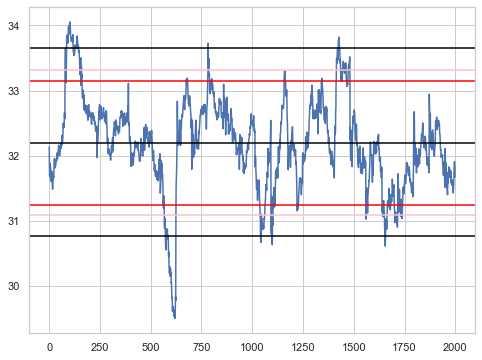

In [53]:
plt.figure(figsize=(8,6))
plt.plot(TS)
plt.axhline(TS.mean(), color='black')
plt.axhline(TS.mean()+n_dev*TS.std(), color='red')
plt.axhline(TS.mean()-n_dev*TS.std(), color='red')
plt.axhline((TS.mean()+n_dev*TS.std())*(1+sl/3), color='pink')
plt.axhline((TS.mean()-n_dev*TS.std())*(1-sl/3), color='pink')
plt.axhline((TS.mean()+n_dev*TS.std())*(1+sl), color='black')
plt.axhline((TS.mean()-n_dev*TS.std())*(1-sl), color='black')

### In sample Testing and Trade Log

In [35]:
posv=[]
arrb=[]
arrs=[]

pos=0
for i in range(len(TS)-1):
    if (TS[i]<=meanp-sdp*n_dev) & (TS[i+1]>=(meanp-sdp*n_dev)):
        if pos==0:
            pos=1
            posv.append(pos)
            arrb.append(TS[i])

    if (TS[i]>=meanp+sdp*n_dev) & (TS[i+1]<=(meanp+sdp*n_dev)):
        if pos==0:
            pos=-1
            posv.append(pos)
            arrb.append(TS[i])

    if TS[i]>=meanp:
        if pos==1:
            pos=0
            arrs.append(TS[i])
    if TS[i]<=meanp:
        if pos==-1:
            pos=0
            arrs.append(TS[i])

    if TS[i]<=(meanp-sdp*n_dev)*(1-sl):
        if pos==1:
            pos=0
            arrs.append(TS[i])

    if TS[i]>=(meanp+sdp*n_dev)*(1+sl):
        if pos==-1:
            pos=0
            arrs.append(TS[i])


In [36]:
return_arr=[]

for i in range(len(arrs)):
    if posv[i]==1:
        if arrb[i]>0:
            return_arr.append((arrs[i]-arrb[i])/arrb[i])
        else:
            return_arr.append((arrb[i]-arrs[i])/arrb[i])
    if posv[i]==-1:

        if arrb[i]>0:
            return_arr.append((arrb[i]-arrs[i])/arrb[i])
        else:
            return_arr.append((arrs[i]-arrb[i])/arrb[i])

In [37]:
(1+np.array(return_arr)).cumprod()

array([0.98613366, 1.02476553, 1.01025118, 1.05841126, 1.10187815,
       1.13813454, 1.17746738, 1.16145246, 1.20020503, 1.24632437,
       1.28818269, 1.32676555, 1.3788748 , 1.43097032, 1.41216789,
       1.46270109])

In [38]:
if len(arrb)==len(arrs):
    print(pd.DataFrame(data={"pos":posv, "buy/sell":arrb, "close":arrs, "profit/loss":return_arr}))
else:
    print(pd.DataFrame(data={"pos":posv[:-1], "buy/sell":arrb[:-1], "close":arrs, "profit/loss":return_arr} ))
        
    

    pos   buy/sell      close  profit/loss
0    -1  33.376871  33.839686    -0.013866
1    -1  33.502405  32.189945     0.039175
2     1  31.200001  30.758098    -0.014164
3     1  31.083408  32.565197     0.047671
4    -1  33.154723  31.793123     0.041068
5    -1  33.256012  32.161750     0.032904
6     1  31.242129  32.321827     0.034559
7     1  31.058726  30.636292    -0.013601
8     1  31.209525  32.250849     0.033366
9    -1  33.289976  32.010768     0.038426
10    1  31.241126  32.290372     0.033585
11   -1  33.184116  32.190206     0.029951
12   -1  33.327159  32.018222     0.039275
13    1  31.028395  32.200684     0.037781
14    1  31.073252  30.664961    -0.013140
15    1  31.142749  32.257165     0.035784


### O/S Testing and Trade Log

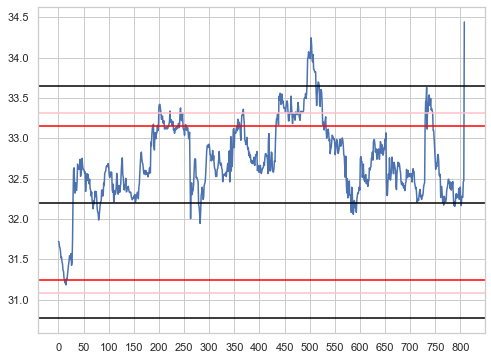

In [39]:
plt.figure(figsize=(8,6))
plt.plot(TS_test)
plt.axhline(TS.mean(), color='black')
plt.axhline(TS.mean()+n_dev*TS.std(), color='red')
plt.axhline(TS.mean()-n_dev*TS.std(), color='red')
plt.axhline((TS.mean()+n_dev*TS.std())*(1+sl/3), color='pink')
plt.axhline((TS.mean()-n_dev*TS.std())*(1-sl/3), color='pink')
plt.axhline((TS.mean()+n_dev*TS.std())*(1+sl), color='black')
plt.axhline((TS.mean()-n_dev*TS.std())*(1-sl), color='black')
plt.xticks(np.arange(min(range(len(TS_test))), max(range(len(TS_test)))+1, 50))
plt.show()

In [40]:
posvt=[]
arrbt=[]
arrst=[]

pos=0

In [41]:
for i in range(len(TS_test)-1):
    if (TS_test[i]<=meanp-sdp*n_dev) & (TS_test[i+1]>=(meanp-sdp*n_dev)):
        if pos==0:
            pos=1
            posvt.append(pos)
            arrbt.append(TS_test[i+1])

    if (TS_test[i]>=meanp+sdp*n_dev) & (TS_test[i+1]<=(meanp+sdp*n_dev)):
        if pos==0:
            pos=-1
            posvt.append(pos)
            arrbt.append(TS_test[i])

    if TS_test[i]>=meanp:
        if pos==1:
            pos=0
            arrst.append(TS_test[i])
    if TS_test[i]<=meanp:
        if pos==-1:
            pos=0
            arrst.append(TS_test[i])
            
    if TS_test[i]<=(meanp-sdp*n_dev)*(1-sl):
        if pos==1:
            pos=0
            arrst.append(TS_test[i])
    
    if TS_test[i]>=(meanp+sdp*n_dev)*(1+sl):
        if pos==-1:
            pos=0
            arrst.append(TS_test[i])

In [42]:
return_arrt=[]

for i in range(len(arrst)):
    if posvt[i]==1:
        if arrbt[i]>0:
            return_arrt.append((arrst[i]-arrbt[i])/arrbt[i])
        else:
            return_arrt.append((arrbt[i]-arrst[i])/arrbt[i])
    if posvt[i]==-1:

        if arrbt[i]>0:
            return_arrt.append((arrbt[i]-arrst[i])/arrbt[i])
        else:
            return_arrt.append((arrst[i]-arrbt[i])/arrbt[i])

In [43]:
return_arrt

[0.03313786230545422,
 0.03529420309596138,
 -0.013290517905457936,
 0.03230776860296499,
 0.04338488531811849]

In [44]:
# trade_log=pd.DataFrame(data={"pos":posvt[:-1], "buy/sell":arrbt[:-1], "close":arrst} )
# trade_log

In [45]:
if len(arrbt)==len(arrst):
    trade_log=pd.DataFrame(data={"pos":posvt, "buy/sell":arrbt, "close":arrst, "profit/loss":return_arrt})
else:
    trade_log=pd.DataFrame(data={"pos":posvt[:-1], "buy/sell":arrbt[:-1], "close":arrst, "profit/loss":return_arrt[:-1]} )
        
    

In [46]:
trade_log

,pos,buy/sell,close,profit/loss
0,1,31.246864,32.282318,0.033138
1,-1,33.175329,32.004432,0.035294
2,-1,33.237335,33.679077,-0.013291
3,-1,33.153319,32.082210,0.032308
4,-1,33.631708,32.172600,0.043385


In [47]:
trade_log["profit_loss"]=return_arrt
trade_log

,pos,buy/sell,close,profit/loss,profit_loss
0,1,31.246864,32.282318,0.033138,0.033138
1,-1,33.175329,32.004432,0.035294,0.035294
2,-1,33.237335,33.679077,-0.013291,-0.013291
3,-1,33.153319,32.082210,0.032308,0.032308
4,-1,33.631708,32.172600,0.043385,0.043385


In [48]:
(1+trade_log.profit_loss).cumprod()

0    1.033138
1    1.069602
2    1.055386
3    1.089483
4    1.136750
Name: profit_loss, dtype: float64

In [49]:
print("The O/S sharpe ratio is {}".format(trade_log.profit_loss.mean()/trade_log.profit_loss.std()))

The O/S sharpe ratio is 1.163557176395093
